In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning

In [22]:
df = pd.read_csv('../model/msl_4.csv')
df.columns = [i for i in range(df.shape[1])]
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.668133,0.575990,-1.245456e-06,0.559841,0.477058,-0.163110,0.502512,0.330015,-0.281766,0.486979,...,0.341133,0.743112,-0.421287,0.379127,0.721945,-0.416987,0.505915,0.707158,-0.401877,A
1,0.775226,0.652336,-4.915925e-07,0.635080,0.496825,-0.127996,0.477498,0.351564,-0.283799,0.460231,...,0.481879,0.914799,-0.469226,0.521024,0.875066,-0.457533,0.616052,0.824982,-0.461446,A
2,0.284280,0.718999,-9.384507e-07,0.366839,0.561318,-0.038444,0.524805,0.400856,-0.087301,0.592993,...,0.651855,0.832896,-0.285252,0.591926,0.811353,-0.252740,0.510428,0.784820,-0.236421,A
3,0.515338,0.678122,-1.622071e-06,0.460059,0.536621,-0.153407,0.480938,0.366841,-0.254906,0.531223,...,0.413181,0.827054,-0.385353,0.402945,0.799876,-0.382126,0.467820,0.774531,-0.364127,A
4,0.410791,0.818512,-4.476685e-07,0.443488,0.578370,-0.175250,0.462646,0.350566,-0.335886,0.411169,...,0.788371,0.825140,-0.422565,0.736056,0.817047,-0.414728,0.631898,0.842833,-0.409830,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815,0.323189,0.863915,-1.398999e-06,0.219781,0.691171,-0.031934,0.211204,0.475005,-0.052855,0.194935,...,0.922588,0.530204,-0.140883,1.021291,0.465799,-0.169046,1.108691,0.406742,-0.175121,Y
2816,0.697179,0.810409,-8.372032e-07,0.771848,0.652388,-0.043625,0.778798,0.475591,-0.067466,0.795528,...,0.095086,0.530283,-0.100160,0.001454,0.473729,-0.114438,-0.080362,0.414790,-0.117273,Y
2817,0.767830,0.795297,-1.136542e-06,0.845434,0.645603,-0.068342,0.844518,0.466906,-0.110583,0.849151,...,0.057504,0.569799,-0.143059,-0.050095,0.508895,-0.158026,-0.145910,0.442628,-0.160585,Y
2818,0.160085,0.712262,-1.169115e-06,0.133987,0.559768,-0.098320,0.144136,0.394708,-0.201602,0.133132,...,0.454248,0.818267,-0.319194,0.510312,0.783325,-0.300155,0.548878,0.747074,-0.291315,Y


In [23]:
print("Uncleaned dataset shape =", df.shape)

Uncleaned dataset shape = (2820, 64)


In [24]:
# removing null values from our dataset

all_null_values = df[df.iloc[:, 0] == 0]
print("Number of null values =", len(all_null_values.index))

Number of null values = 0


In [25]:
# dropping those null values from our dataset

df.drop(all_null_values.index, inplace=True)

In [26]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.668133,0.575990,-1.245456e-06,0.559841,0.477058,-0.163110,0.502512,0.330015,-0.281766,0.486979,...,0.341133,0.743112,-0.421287,0.379127,0.721945,-0.416987,0.505915,0.707158,-0.401877,A
1,0.775226,0.652336,-4.915925e-07,0.635080,0.496825,-0.127996,0.477498,0.351564,-0.283799,0.460231,...,0.481879,0.914799,-0.469226,0.521024,0.875066,-0.457533,0.616052,0.824982,-0.461446,A
2,0.284280,0.718999,-9.384507e-07,0.366839,0.561318,-0.038444,0.524805,0.400856,-0.087301,0.592993,...,0.651855,0.832896,-0.285252,0.591926,0.811353,-0.252740,0.510428,0.784820,-0.236421,A
3,0.515338,0.678122,-1.622071e-06,0.460059,0.536621,-0.153407,0.480938,0.366841,-0.254906,0.531223,...,0.413181,0.827054,-0.385353,0.402945,0.799876,-0.382126,0.467820,0.774531,-0.364127,A
4,0.410791,0.818512,-4.476685e-07,0.443488,0.578370,-0.175250,0.462646,0.350566,-0.335886,0.411169,...,0.788371,0.825140,-0.422565,0.736056,0.817047,-0.414728,0.631898,0.842833,-0.409830,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815,0.323189,0.863915,-1.398999e-06,0.219781,0.691171,-0.031934,0.211204,0.475005,-0.052855,0.194935,...,0.922588,0.530204,-0.140883,1.021291,0.465799,-0.169046,1.108691,0.406742,-0.175121,Y
2816,0.697179,0.810409,-8.372032e-07,0.771848,0.652388,-0.043625,0.778798,0.475591,-0.067466,0.795528,...,0.095086,0.530283,-0.100160,0.001454,0.473729,-0.114438,-0.080362,0.414790,-0.117273,Y
2817,0.767830,0.795297,-1.136542e-06,0.845434,0.645603,-0.068342,0.844518,0.466906,-0.110583,0.849151,...,0.057504,0.569799,-0.143059,-0.050095,0.508895,-0.158026,-0.145910,0.442628,-0.160585,Y
2818,0.160085,0.712262,-1.169115e-06,0.133987,0.559768,-0.098320,0.144136,0.394708,-0.201602,0.133132,...,0.454248,0.818267,-0.319194,0.510312,0.783325,-0.300155,0.548878,0.747074,-0.291315,Y


In [27]:
print("Cleaned dataset shape =", df.shape)

Cleaned dataset shape = (2820, 64)


## Data Preparation

In [28]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (2820, 63)
Labels shape = (2820,)


## Data Split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Model Making

In [30]:
svm = SVC(C=100, gamma=0.1, kernel='rbf')

In [31]:
svm.fit(x_train, y_train)

SVC(C=100, gamma=0.1)

In [32]:
print("Training score =", svm.score(x_train, y_train))

Training score = 1.0


In [33]:
y_pred = svm.predict(x_test)

In [34]:
print("Testing score =", accuracy_score(y_test, y_pred))

Testing score = 0.9964539007092199


## Visualization

In [35]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')

In [36]:
f1, recall, precision

(0.9964539007092199, 0.9964539007092199, 0.9964539007092199)

<AxesSubplot:title={'center':'Confusion Matrix - American Sign Language'}>

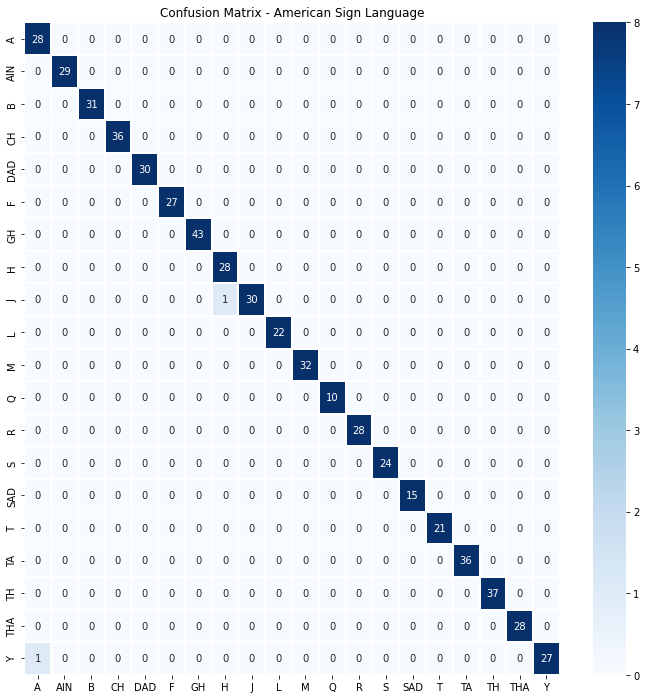

In [37]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [38]:
maping.figure.savefig("msl_output_4.png")

In [39]:
import joblib

In [40]:

joblib.dump(svm, "../model/msl_model_4.pkl")

['../model/msl_model_4.pkl']